In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore (1).csv


In [ ]:
#By default, pandas.read_csv() assumes the file is encoded in UTF-8. If the file uses a different encoding, it will throw a UnicodeDecodeError
#We need to specify the correct encoding when reading the CSV file. Common encodings to try include: latin-1 or ISO-8859-1: Common for files with special characters.
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(io.BytesIO(uploaded['Sample - Superstore (1).csv']), encoding='latin-1')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#This gives you a statistical summary of numerical columns (e.g., mean, median, min, max)
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Checking for null values
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
#Calculate total Sales and Profit
#Analyze Sales and Profit
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()
print(f'Total Sales: {total_sales}')
print(f'Total Profit: {total_profit}')

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


<ipython-input-40-de096c5a8e01>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Sales'].resample('M').sum().plot(title='Monthly Sales Trend')


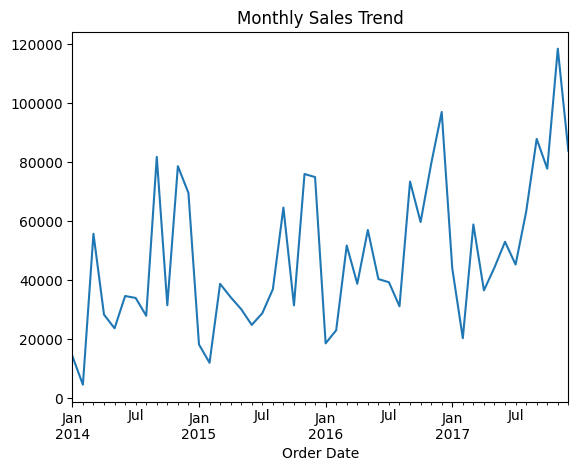

In [ ]:
#Analyze Trends Over Time
#Analyse Sales and Profit Over Time
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)
data['Sales'].resample('M').sum().plot(title='Monthly Sales Trend')
plt.show()

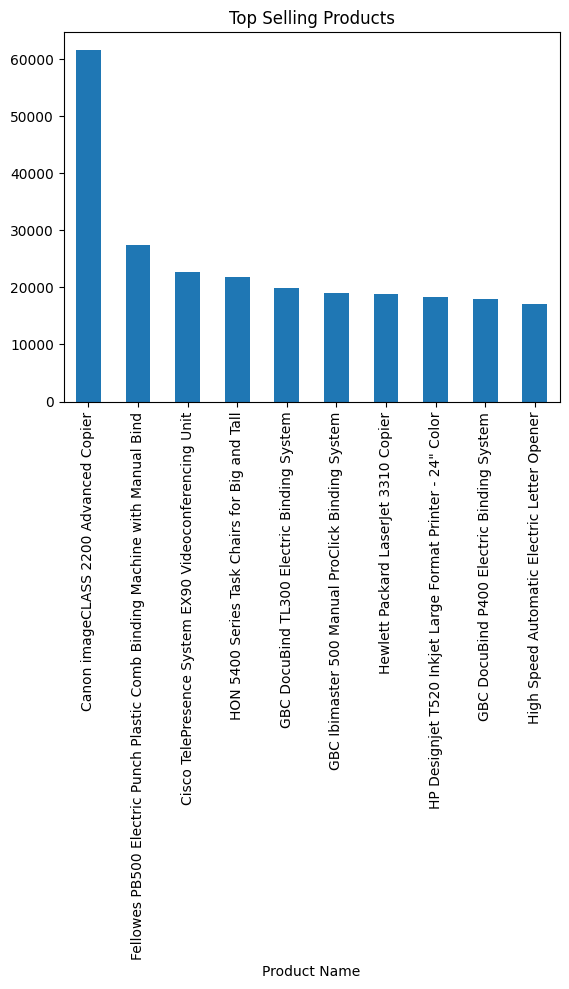

In [ ]:
#Top-Selling Products:
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top Selling Products')
plt.show()

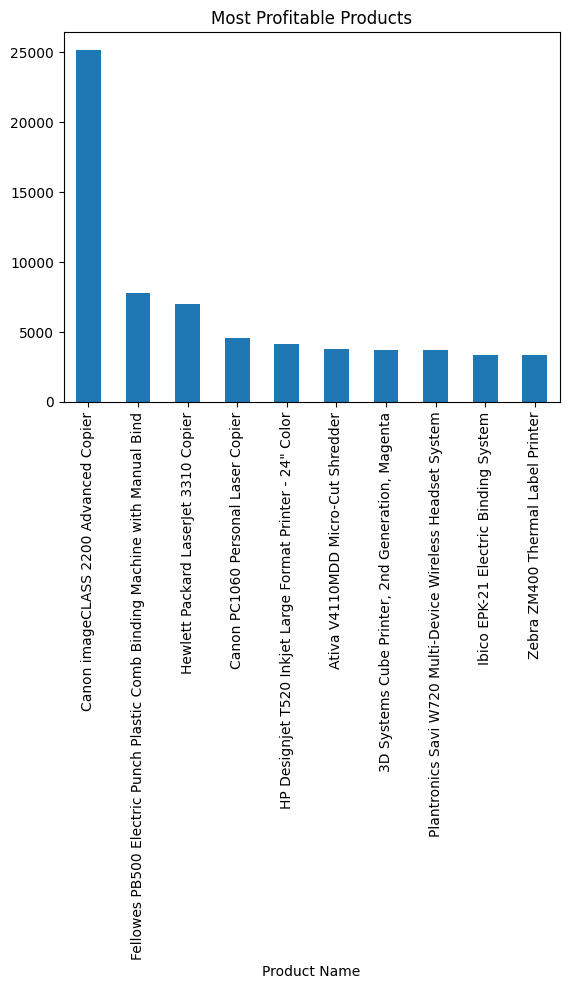

In [ ]:
#Most Profitable Products
profitable_products = data.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
profitable_products.plot(kind='bar', title='Most Profitable Products')
plt.show()

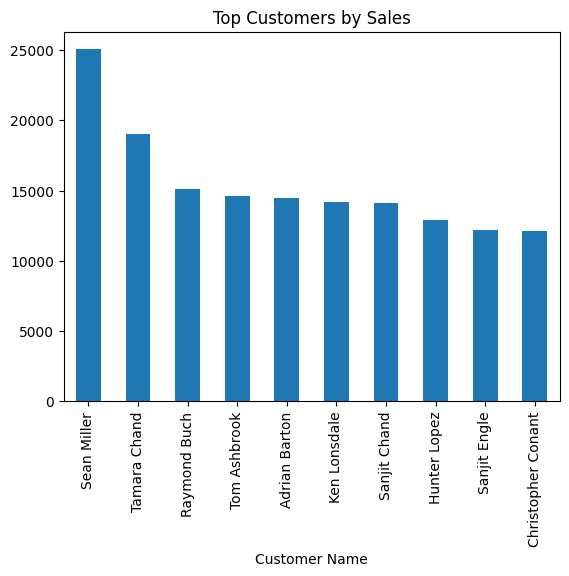

In [ ]:
#Top Customers by Sale
top_customers = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top Customers by Sales')
plt.show()

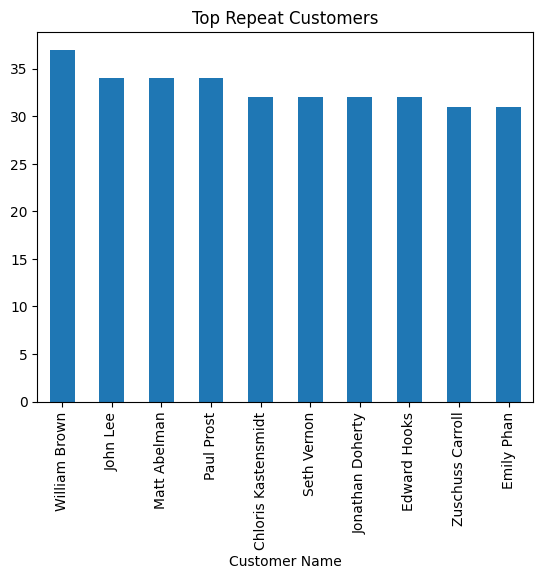

In [ ]:
#Repeat Customers
repeat_customers = data['Customer Name'].value_counts().head(10)
repeat_customers.plot(kind='bar', title='Top Repeat Customers')
plt.show()

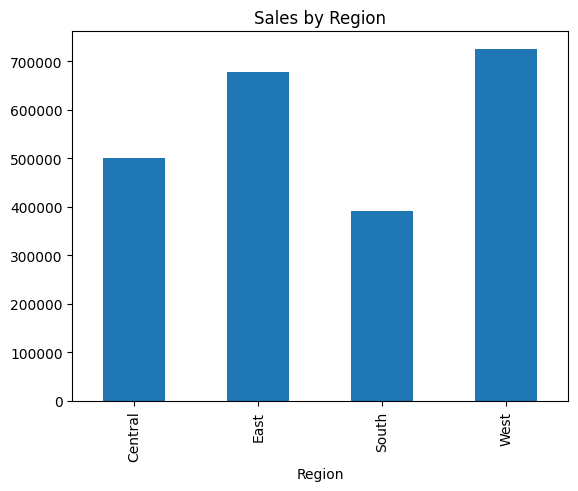

In [ ]:
#Sales by region
region_sales = data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', title='Sales by Region')
plt.show()

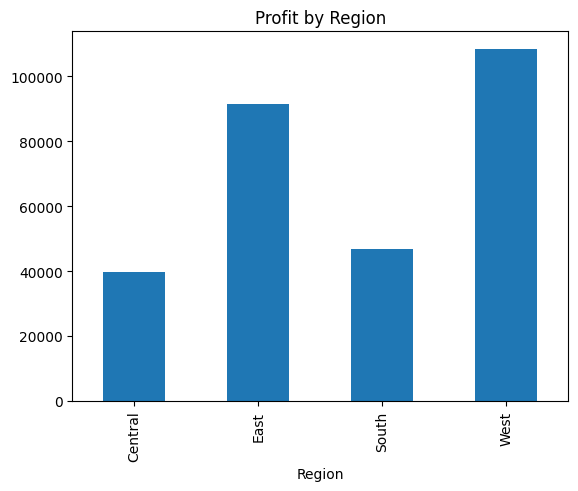

In [ ]:
#Profit by Region
region_profit = data.groupby('Region')['Profit'].sum()
region_profit.plot(kind='bar', title='Profit by Region')
plt.show()

In [ ]:
 #Low Profit Products
low_profit_products = data[data['Profit'] < 0]
print(low_profit_products[['Product Name', 'Profit']])

                                                 Product Name     Profit
Order Date                                                              
2015-10-11      Bretford CR4500 Series Slim Rectangular Table  -383.0310
2015-11-22  Holmes Replacement Filter for HEPA Air Cleaner...  -123.8580
2015-11-22   Storex DuraTech Recycled Plastic Frosted Binders    -3.8160
2017-07-16                 Global Deluxe Stacking Chair, Gray    -1.0196
2015-09-17  Riverside Palais Royal Lawyers Bookcase, Royal... -1665.0522
...                                                       ...        ...
2016-03-15  GBC Pre-Punched Binding Paper, Plastic, White,...   -35.8176
2014-11-24                    Acco Expandable Hanging Binders    -4.5936
2015-11-13     O'Sullivan Living Dimensions 3-Shelf Bookcases   -40.1960
2016-06-03       Hon 61000 Series Interactive Training Tables    -1.7772
2015-03-19  Bush Heritage Pine Collection 5-Shelf Bookcase...   -67.6704

[1871 rows x 2 columns]


In [ ]:
#Underperforming Regions
underperforming_regions = data.groupby('Region')['Profit'].sum().sort_values().head(1)
print(underperforming_regions)

Region
Central    39706.3625
Name: Profit, dtype: float64


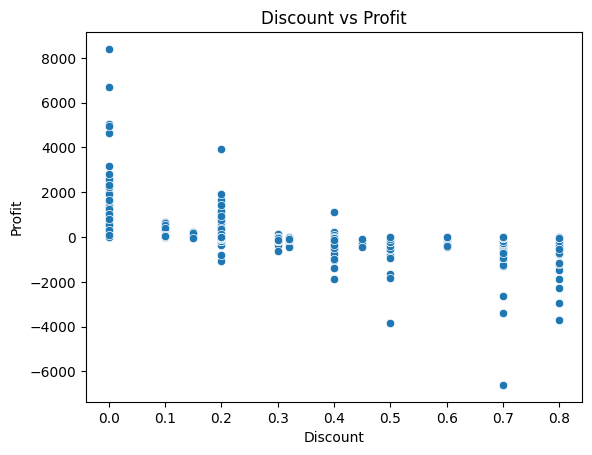

In [ ]:
#Discount Impact
sns.scatterplot(x='Discount', y='Profit', data=data)
plt.title('Discount vs Profit')
plt.show()

In [ ]:
#Ensuring that only numeric columns are included in the correlation matrix
# Select specific numeric columns
numeric_data = data[['Sales', 'Quantity', 'Discount', 'Profit']]

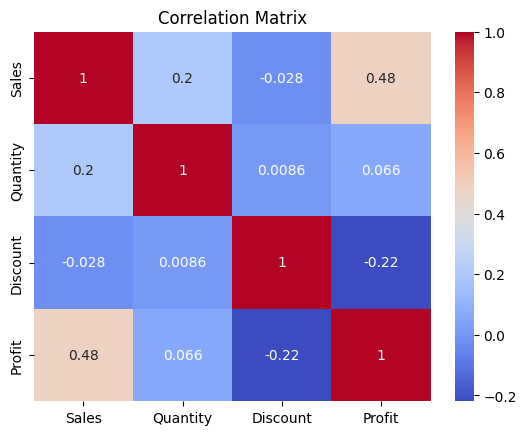

In [ ]:
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

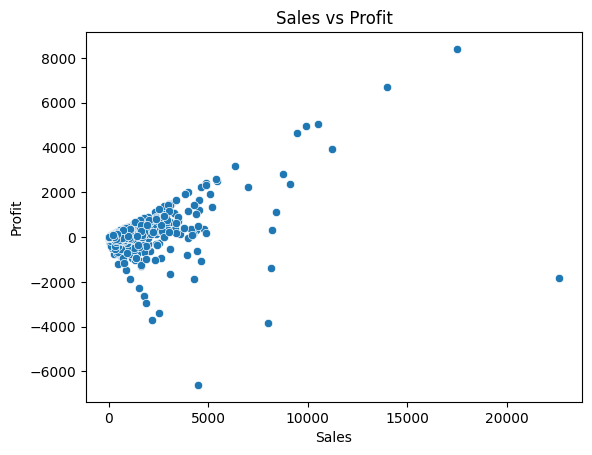

In [ ]:
#Sales Vs Profit Graph
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.title('Sales vs Profit')
plt.show()